### Importing the relevant libraries

In [730]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from warnings import filterwarnings
filterwarnings('ignore')

### Load the raw data

In [731]:
raw_data = pd.read_csv(r"C:\Users\Kural\OneDrive - Lambton College\Sem 1\Cloud Storage Fundamentals for Canadian Enterprises\BD - Project\1.04. Real-life example.csv")
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


### Preprocessing

#### Exploring the descriptive statistics of variables

In [732]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


From above, we can see that Model column is categorical variable and having 312 unique values, which implies, after converting it to dummy, it will add 312 new columns to the dataframe, so we will drop this column

#### Determining the variables of intereset

In [733]:
df = raw_data.drop('Model', axis=1)
# dropping Engine Version column becasue we wont be using it and it has a lot of noisy data
df=df.drop(['EngineV'], axis = 1)

In [734]:
df.columns

Index(['Brand', 'Price', 'Body', 'Mileage', 'Engine Type', 'Registration',
       'Year'],
      dtype='object')

#### Imputaion: Dealing with missing/null values
fillna() : Return a copy of the data with missing values filled or imputed.
Replacing Price Mean value (Average) to other columns 


In [735]:
df.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
Engine Type       0
Registration      0
Year              0
dtype: int64

In [736]:
df=df.fillna(df['Price'].mean(skipna=True))

In [737]:
df.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [738]:
df.describe(include='all')

,Brand,Price,Body,Mileage,Engine Type,Registration,Year
count,4345,4345.000000,4345,4345.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,NaN,NaN,2006.550058
std,NaN,25072.625077,NaN,105.705797,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,NaN,NaN,1969.000000
25%,NaN,7100.000000,NaN,86.000000,NaN,NaN,2003.000000
50%,NaN,11900.000000,NaN,155.000000,NaN,NaN,2008.000000
75%,NaN,20900.000000,NaN,230.000000,NaN,NaN,2012.000000


In [739]:
df[df['Mileage']==0].shape

(185, 7)

In [740]:
df.shape

(4345, 7)

In [741]:
df['Mileage']=df['Mileage'].mask(df.Mileage==0,df['Mileage'].mean(skipna=True))

In [742]:
df.shape

(4345, 7)

In [743]:
df = df[df['Mileage']>50] 
df = df[df['Mileage']<400]

In [744]:
df.shape

(3735, 7)

In [745]:
#check duplicate values
df.duplicated().sum()

77

In [746]:
df.drop_duplicates(keep='first',inplace=True)

In [747]:
df.shape

(3658, 7)

#### Distplot

<Axes: xlabel='Price', ylabel='Density'>

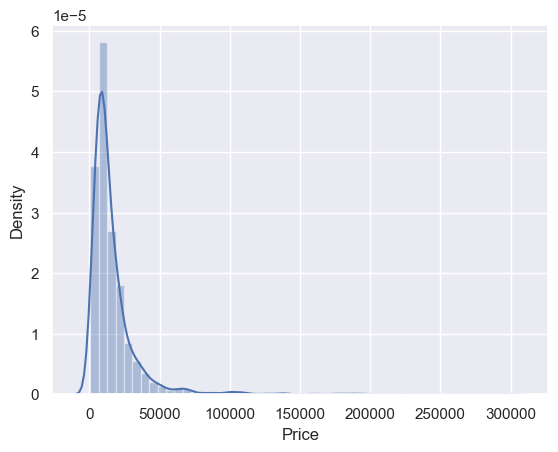

In [607]:
sns.distplot(df['Price'])

From above, we can say that Price column is not normally distributed, so we need to remove some outliers from data

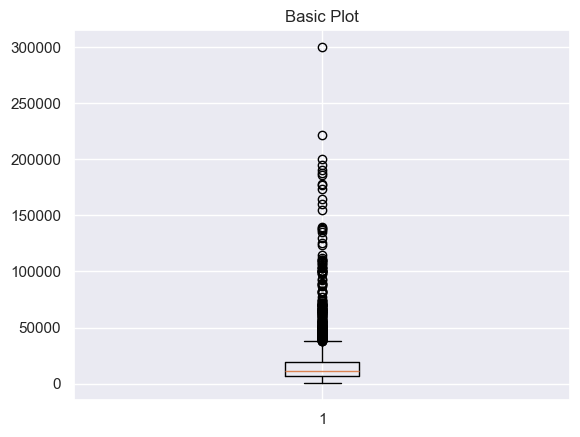

In [608]:
#boxplot
# data = df['Price']
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(df['Price'])
plt.show()

In [609]:
q = df['Price'].quantile(1)
df = df[df['Price'] < q]

<Axes: xlabel='Price', ylabel='Density'>

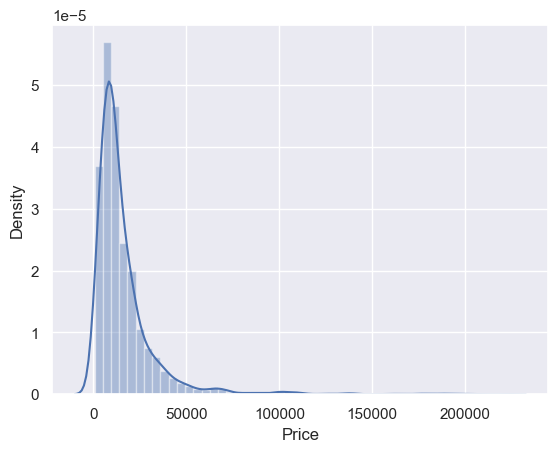

In [610]:
sns.distplot(df['Price'])

<Axes: xlabel='Mileage', ylabel='Density'>

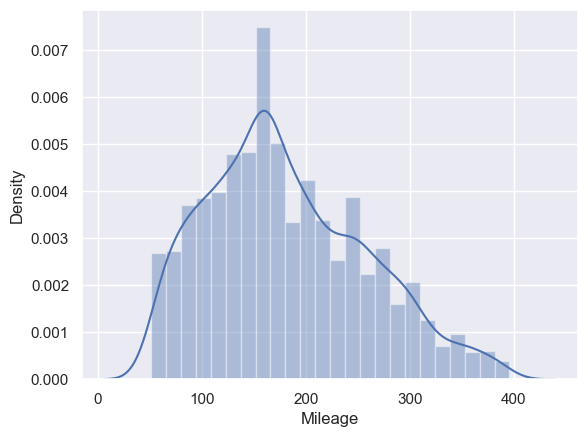

In [611]:
sns.distplot(df['Mileage'])

<Axes: xlabel='Year', ylabel='Density'>

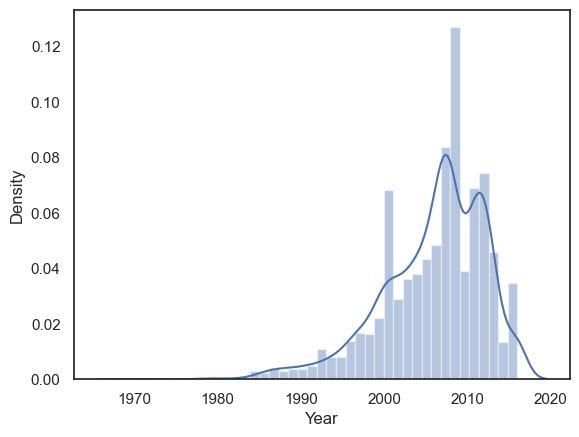

In [753]:
sns.distplot(df['Year'])

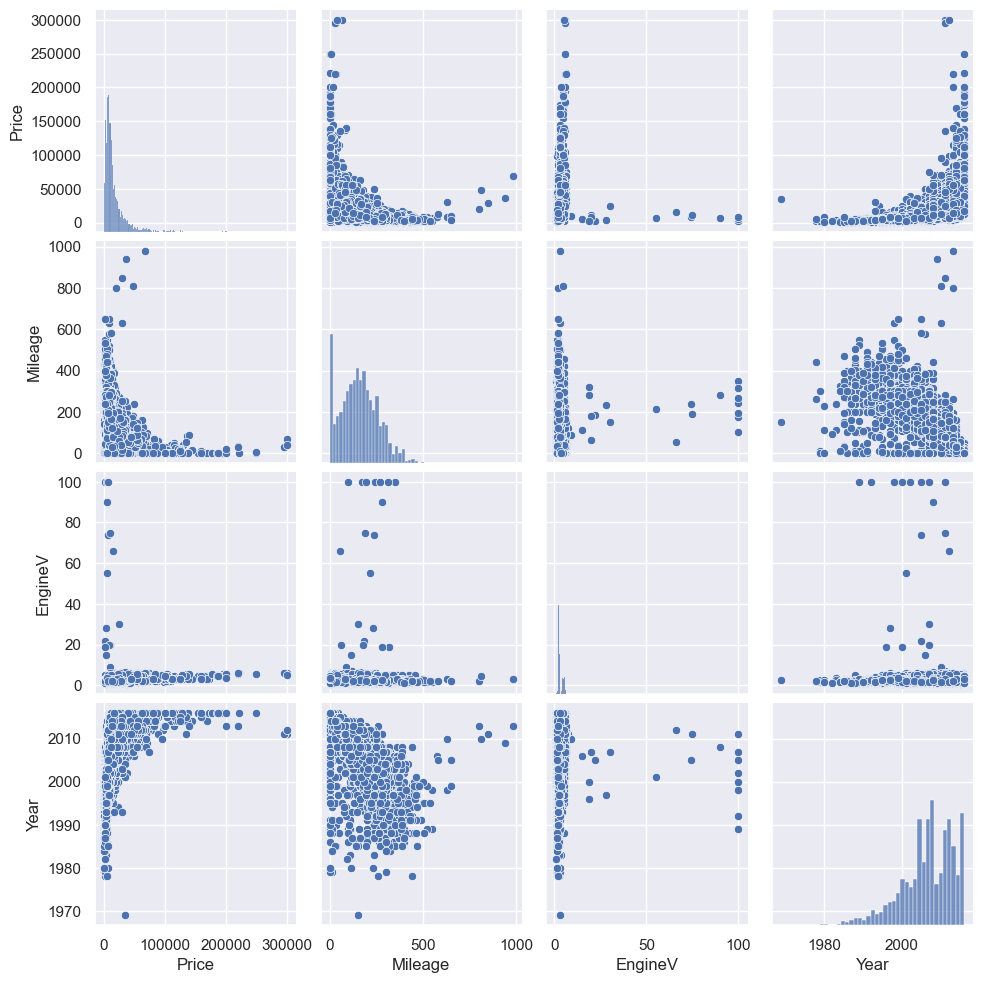

In [612]:
sns.pairplot(raw_data)

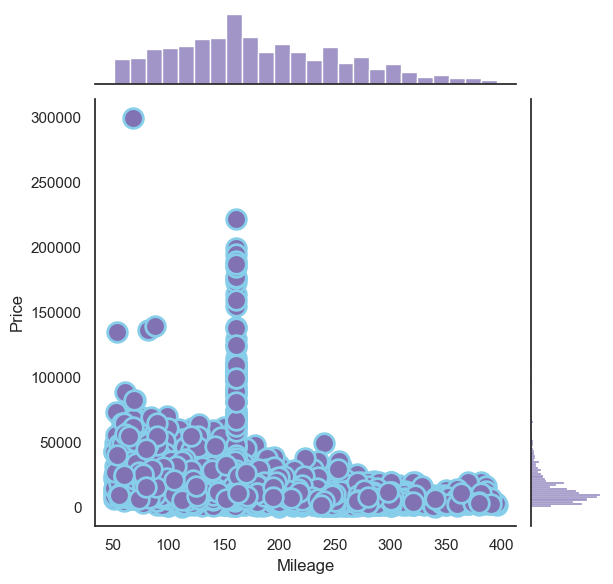

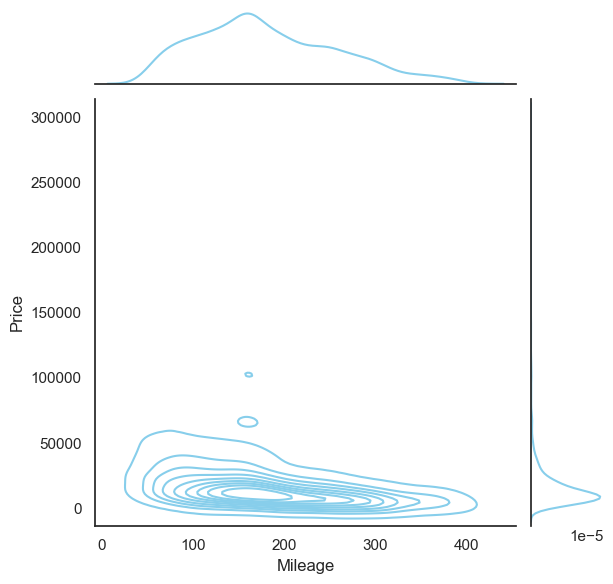

In [751]:
# Then you can pass arguments to each type:
sns.jointplot(x=df["Mileage"], y=df["Price"], kind='scatter', s=200, color='m', edgecolor="skyblue", linewidth=2)
 
# Custom the color
sns.set(style="white", color_codes=True)
sns.jointplot(x=df["Mileage"], y=df["Price"], kind='kde', color="skyblue")

plt.show()

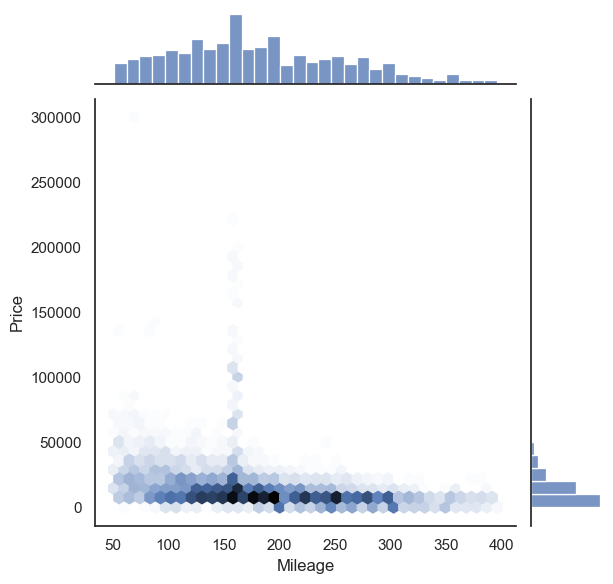

In [756]:
sns.jointplot(x=df["Mileage"], y=df["Price"], kind='hex', marginal_kws=dict(bins=30, fill=True))

plt.show()

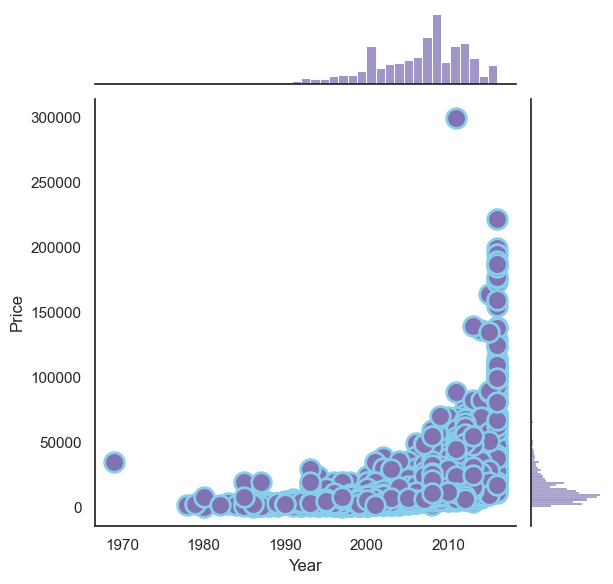

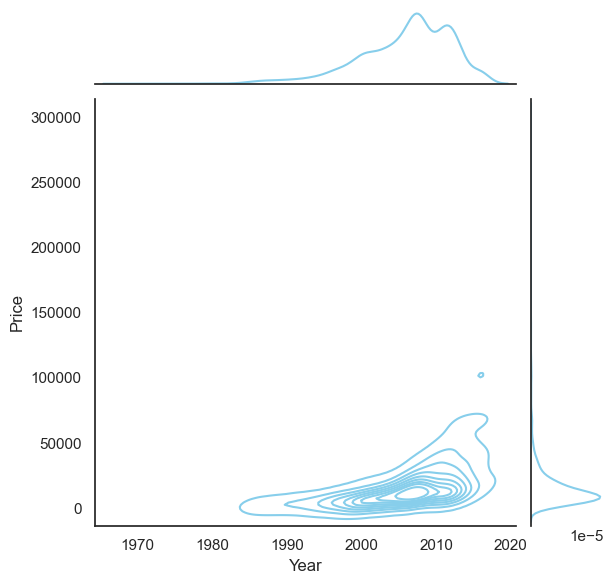

In [761]:
# Then you can pass arguments to each type:
sns.jointplot(x=df["Year"], y=df["Price"], kind='scatter', s=200, color='m', edgecolor="skyblue", linewidth=2)
 
# Custom the color
sns.set(style="white", color_codes=True)
sns.jointplot(x=df["Year"], y=df["Price"], kind='kde', color="skyblue")

plt.show()

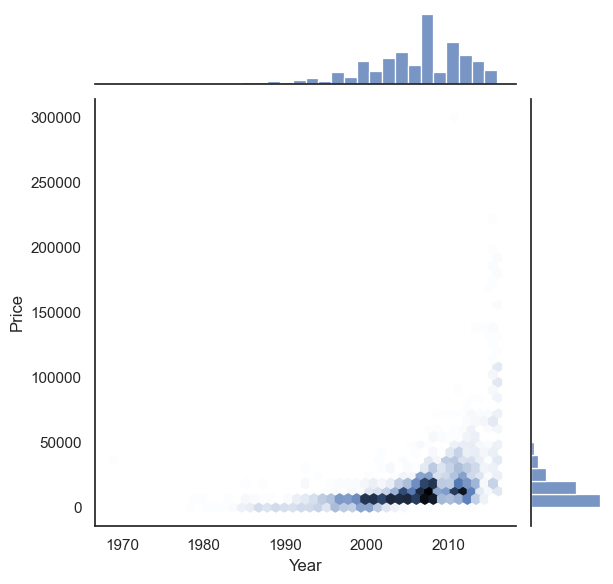

In [762]:
sns.jointplot(x=df["Year"], y=df["Price"], kind='hex', marginal_kws=dict(bins=30, fill=True))

plt.show()

In [763]:
data_cleaned = df.reset_index(drop=True)
data_cleaned

,Brand,Price,Body,Mileage,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277.000000,Petrol,yes,1991
1,Mercedes-Benz,13300.0,sedan,358.000000,Gas,yes,2003
2,Audi,23000.0,crossover,240.000000,Petrol,yes,2007
3,Toyota,18300.0,crossover,120.000000,Petrol,yes,2011
4,Mercedes-Benz,199999.0,crossover,161.237284,Petrol,yes,2016
...,...,...,...,...,...,...,...
3653,BMW,12090.0,hatch,145.000000,Petrol,yes,2010
3654,Renault,2100.0,vagon,237.000000,Diesel,no,2001
3655,Renault,6800.0,sedan,152.000000,Petrol,yes,2007
3656,Volkswagen,11500.0,van,163.000000,Diesel,yes,2008


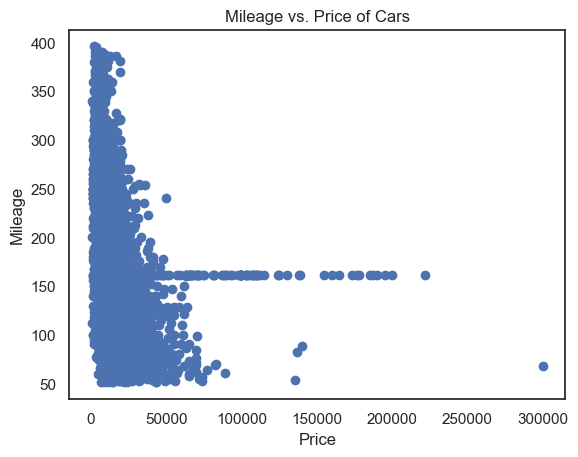

In [765]:
#you will notice that the price gets larger as the mileage gets smaller, and vice versa 
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.set_ylabel('Mileage')
ax1.set_xlabel('Price')
ax1.set_title('Mileage vs. Price of Cars')
ax1.scatter(data_cleaned.Price, data_cleaned.Mileage)

### Checking the OLS assumptions

#### Linearity

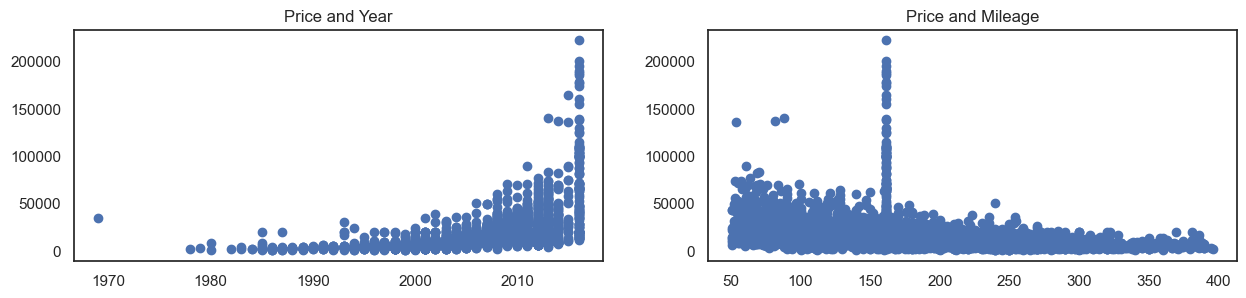

In [618]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 3))

ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')

ax2.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax2.set_title('Price and Mileage')

plt.show()

### From above plot, we can say that relationship is not linear in any of the case, so for now we cannot apply linear regression, first of all, we have to do some changes in the dataset

#### Relaxing the assumptions

In [766]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,Engine Type,Registration,Year,log_price
count,3658,3658.000000,3658,3658.000000,3658,3658,3658.000000,3658.000000
unique,7,NaN,6,NaN,4,2,NaN,NaN
top,Volkswagen,NaN,sedan,NaN,Diesel,yes,NaN,NaN
freq,817,NaN,1406,NaN,1685,3284,NaN,NaN
mean,NaN,16168.647274,NaN,181.426092,NaN,NaN,2005.961728,9.322287
std,NaN,18798.362053,NaN,76.452602,NaN,NaN,6.200475,0.836241
min,NaN,600.000000,NaN,51.000000,NaN,NaN,1969.000000,6.396930
25%,NaN,6999.000000,NaN,124.000000,NaN,NaN,2002.000000,8.853523
50%,NaN,10950.000000,NaN,169.000000,NaN,NaN,2007.000000,9.301095
75%,NaN,19418.746935,NaN,235.000000,NaN,NaN,2011.000000,9.873994


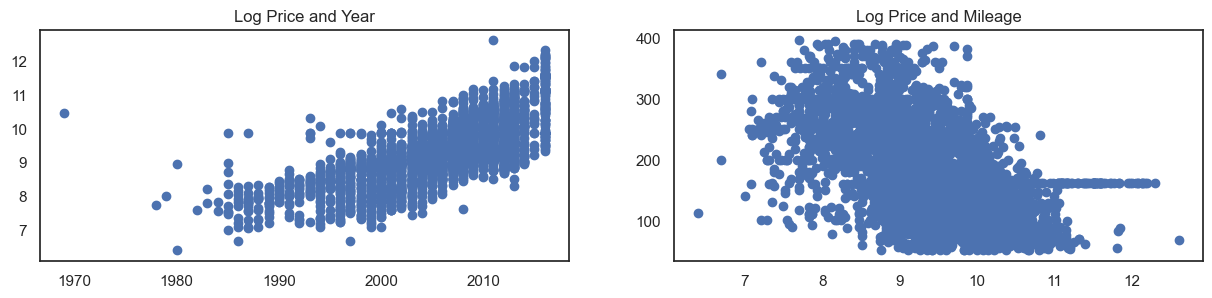

In [768]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 3))

ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('Log Price and Year')

ax2.scatter(data_cleaned['log_price'], data_cleaned['Mileage'])
ax2.set_title('Log Price and Mileage')

plt.show()

After transformation, we can say that we got linear patterns in almost all plots now

In [769]:
# Dropping Price column as we are using log transformed and normalised log_price as a target variable
data_cleaned = data_cleaned.drop(['Price'], axis=1)

#### Multicollinearity

In [770]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [771]:
variables = data_cleaned[['Mileage', 'Year']]
vif = pd.DataFrame()

In [772]:
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

In [773]:
vif['Features'] = variables.columns

In [774]:
vif

,VIF,Features
0,6.570917,Mileage
1,6.570917,Year


### Create Dummy Variables
Cateogrical Transformation


In [775]:
data_dummies = pd.get_dummies(data_cleaned, drop_first=True)

In [776]:
data_dummies = data_dummies.replace({True: 1, False: 0})

In [777]:
data_dummies.head()

,Mileage,Year,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277.000000,1991,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,358.000000,2003,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,240.000000,2007,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,120.000000,2011,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4,161.237284,2016,12.206068,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1


In [778]:
data_dummies.columns.values

array(['Mileage', 'Year', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota',
       'Brand_Volkswagen', 'Body_hatch', 'Body_other', 'Body_sedan',
       'Body_vagon', 'Body_van', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_yes'], dtype=object)

In [779]:
cols = ['log_price', 'Year', 'Mileage', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [780]:
data_preprocessed = data_dummies[cols]

In [781]:
variables = data_preprocessed
variables.head()

,log_price,Year,Mileage,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,1991,277.000000,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,9.495519,2003,358.000000,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,10.043249,2007,240.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,9.814656,2011,120.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4,12.206068,2016,161.237284,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1


In [782]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns.values
vif

,VIF,Features
0,374.288546,log_price
1,469.591992,Year
2,11.932666,Mileage
3,2.506567,Brand_BMW
4,3.050353,Brand_Mercedes-Benz
5,2.053211,Brand_Mitsubishi
6,2.671030,Brand_Renault
7,2.378294,Brand_Toyota
8,3.466483,Brand_Volkswagen
9,1.731818,Body_hatch


Obviously, 'log_price' has a very high VIF. This implies it is most definitely linearly correlated with all the other variables. And this is no surprise! We are using a linear regression to determine 'log_price' given values of the independent variables! This is exactly what we expect - a linear relationship!

However, to actually assess multicollinearity for the predictors, we have to drop 'log_price'. The multicollinearity assumption refers only to the idea that the independent variables shoud not be collinear.

In [783]:
# Since log_price has the highest VIF, removing it from the model
variables = data_preprocessed.drop(['Year', 'log_price'], axis=1)
variables.head()

,Mileage,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277.000000,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,358.000000,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,240.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,120.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4,161.237284,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1


In [784]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns.values
vif

,VIF,Features
0,6.016542,Mileage
1,2.107226,Brand_BMW
2,2.606348,Brand_Mercedes-Benz
3,1.651549,Brand_Mitsubishi
4,2.146282,Brand_Renault
5,1.964860,Brand_Toyota
6,2.863451,Brand_Volkswagen
7,1.423730,Body_hatch
8,1.587433,Body_other
9,3.272396,Body_sedan


### Linear Regression Model

#### Declare the inputs and targets

In [785]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price','Year'], axis=1)

#### Scale the data

In [786]:
inputs

,Mileage,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277.000000,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,358.000000,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,240.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,120.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4,161.237284,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3653,145.000000,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1
3654,237.000000,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3655,152.000000,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1
3656,163.000000,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1


In [787]:
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [788]:
inputs_scaled = scaler.transform(inputs)

#### Train Test Split

In [789]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.30, random_state=42)

### Linear Regression

In [790]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [801]:
reg.score(x_train, y_train)

0.6510041289501809

### Testing

In [802]:
y_pred = reg.predict(x_test)

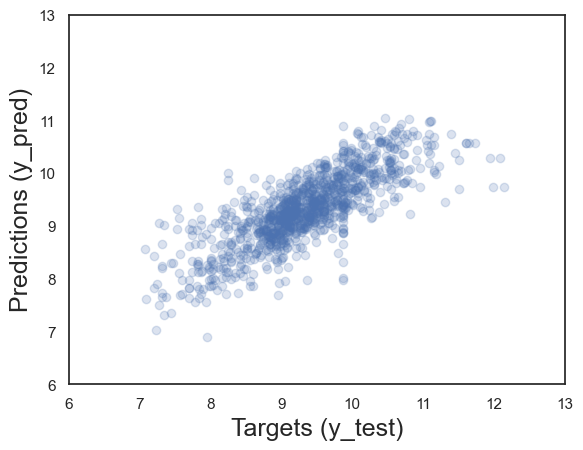

In [803]:
plt.scatter(y_test, y_pred, alpha=0.2)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Predictions (y_pred)', size=18)
plt.xlim(6, 13)
plt.ylim(6, 13)
plt.show()

In [804]:
df_pf = pd.DataFrame(np.exp(y_pred), columns=['Prediction'])
df_pf.head()

,Prediction
0,15054.008229
1,9722.122802
2,8588.277525
3,14621.287179
4,6366.647946


In [805]:
y_test = y_test.reset_index(drop=True)

In [806]:
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Prediction,Target
0,15054.008229,12000.0
1,9722.122802,10499.0
2,8588.277525,15635.1
3,14621.287179,7300.0
4,6366.647946,6700.0


In [807]:
df_pf['Residuals'] = df_pf['Target'] - df_pf['Prediction']
df_pf.head()

,Prediction,Target,Residuals
0,15054.008229,12000.0,-3054.008229
1,9722.122802,10499.0,776.877198
2,8588.277525,15635.1,7046.822475
3,14621.287179,7300.0,-7321.287179
4,6366.647946,6700.0,333.352054


In [808]:
df_pf['Difference%'] = np.absolute(df_pf['Residuals'] / df_pf['Target'] * 100)
df_pf.sort_values(by=['Difference%'])
df_pf.head()

,Prediction,Target,Residuals,Difference%
0,15054.008229,12000.0,-3054.008229,25.450069
1,9722.122802,10499.0,776.877198,7.399535
2,8588.277525,15635.1,7046.822475,45.070530
3,14621.287179,7300.0,-7321.287179,100.291605
4,6366.647946,6700.0,333.352054,4.975404


### Summary Statistics

In [809]:
# R2 Score
reg.score(x_train, y_train)

0.6510041289501809

In [810]:
# MAE
metrics.mean_absolute_error(y_test,y_pred)

0.3700653327815938

In [811]:
# MSE
metrics.mean_squared_error(y_test,y_pred)

0.2506059922378033

In [812]:
# RMSE
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

0.5006056254556108

In [813]:
# intercept
reg.intercept_

9.320978955739115

In [814]:
reg.coef_

array([-0.37271808,  0.03952619,  0.05748786, -0.16502602, -0.22692823,
       -0.05655303, -0.11991176, -0.24039658, -0.16296123, -0.32830571,
       -0.19988357, -0.26027216, -0.12822095, -0.03310397, -0.13838442,
        0.33178788])

In [815]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_

In [816]:
reg_summary

,Features,Weights
0,Mileage,-0.372718
1,Brand_BMW,0.039526
2,Brand_Mercedes-Benz,0.057488
3,Brand_Mitsubishi,-0.165026
4,Brand_Renault,-0.226928
5,Brand_Toyota,-0.056553
6,Brand_Volkswagen,-0.119912
7,Body_hatch,-0.240397
8,Body_other,-0.162961
9,Body_sedan,-0.328306
